#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import streamlit as st
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy


#### Load Datasets

In [2]:
df_1 = pd.read_csv("dataset.csv")

print("Dataset shape is:", df_1.shape)

df_1.head()

Dataset shape is: (4925, 18)


,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Acne,skin_rash,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Acne,pus_filled_pimples,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Acne,skin_rash,blackheads,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Acne,skin_rash,pus_filled_pimples,scurring,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_2 = pd.read_csv("symptom_Description.csv")

print("Description shape is:", df_2.shape)

df_2.head()

Description shape is: (42, 2)


,Disease,Description
0,Drug Reaction,An adverse drug reaction (ADR) is an injury ca...
1,Malaria,An infectious disease caused by protozoan para...
2,Allergy,An allergy is an immune system response to a f...
3,Hypothyroidism,"Hypothyroidism, also called underactive thyroi..."
4,Psoriasis,Psoriasis is a common skin disorder that forms...


In [4]:
df_3 = pd.read_csv("symptom_precaution.csv")

print("Precaution shape is:", df_3.shape)
#df_3.fillna()
df_3.head()

Precaution shape is: (42, 5)


,Disease,Precaution_1,Precaution_2,Precaution_3,Precaution_4
0,Drug Reaction,stop irritation,consult nearest hospital,stop taking drug,follow up
1,Malaria,Consult nearest hospital,avoid oily food,avoid non veg food,keep mosquitos out
2,Allergy,apply calamine,cover area with bandage,use ice to compress itching,know and avoid allergens
3,Hypothyroidism,reduce stress,exercise,eat healthy,get proper sleep
4,Psoriasis,wash hands with warm soapy water,stop bleeding using pressure,consult doctor,salt baths


In [5]:
"""A function that takes in a disease name , gives you a discription about the disease and precautions to take."""
def drug_info(disease):
    d = disease

    # Print disease description
    print("The predicted disease is:", d.strip().replace("_", " "))
    print(" ")
    print("Description of", d.strip().replace("_", " "),":")
    print(df_2[df_2["Disease"] == d]["Description"].item())
    print(" ")

    # Print Precautions to take
    print("Precautions to take are:")
    print(df_3[df_3["Disease"] == d]["Precaution_1"].item().title()) 
    print(df_3[df_3["Disease"] == d]["Precaution_2"].item().title())
    print(df_3[df_3["Disease"] == d]["Precaution_3"].item().title())
    print(df_3[df_3["Disease"] == d]["Precaution_4"].item().title())

In [6]:
drug_info("Malaria")

The predicted disease is: Malaria
 
Description of Malaria :
An infectious disease caused by protozoan parasites from the Plasmodium family that can be transmitted by the bite of the Anopheles mosquito or by a contaminated needle or transfusion. Falciparum malaria is the most deadly type.
 
Precautions to take are:
Consult Nearest Hospital
Avoid Oily Food
Avoid Non Veg Food
Keep Mosquitos Out


In [7]:
df_4 = pd.read_csv("Symptom-severity.csv")

print("Severity shape is:", df_4.shape)

df_4.head()

Severity shape is: (134, 2)


,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [8]:
def encode_symptoms(df, df_4):
    for i in df_4.index:
        symptom = df_4["Symptom"][i]
        weight = df_4["weight"][i]
        df = df.replace(symptom, weight)

    # Replace missing values with 0
    df = df.fillna(0)

    # Additional hardcoded replacements
    df = df.replace("foul_smell_of_urine", 5)
    df = df.replace("dischromic__patches", 6)
    df = df.replace("spotting__urination", 6)
    
    return df

In [37]:
new_df = encode_symptoms(df_1, df_4)
new_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Acne,3.0,2,2,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Acne,3.0,2,2,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Acne,2.0,2,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Acne,3.0,2,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Acne,3.0,2,2,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Initial Random Forest based on encoding disease severity

In [38]:
# separating the data and labels
X = new_df.drop(columns='Disease', axis=1)
Y = new_df['Disease']

In [39]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [133]:
from sklearn.ensemble import RandomForestClassifier
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rfc_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model on the training data
rfc_classifier.fit(X_train, Y_train)

# Predict disease labels on the testing data
Y_pred = rfc_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

precision = precision_score(Y_test, Y_pred, average='macro')
recall = recall_score(Y_test, Y_pred,average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')

print("Random Forest")
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')
print(accuracy_score(Y_test, Y_pred,normalize=False))
print("Confusion matrix")
conf_matrix=confusion_matrix(Y_test,Y_pred)
print(conf_matrix)

Random Forest
Accuracy: 0.9908536585365854
Precision: 0.9916531165311654
Recall: 0.9918172648227722
F1-Score: 0.9914105369307706
975
Confusion matrix
[[31  0  0 ...  0  0  0]
 [ 0 28  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 24  0  0]
 [ 0  0  0 ...  0 22  0]
 [ 0  0  0 ...  0  0 24]]


### Second Model with a transformed data

In [10]:
train_df = pd.read_csv("Training.csv")
test_df = pd.read_csv("Testing.csv")

In [2]:
train_df.head()

In [12]:
list(train_df.columns)[:5]

['itching',
 'skin_rash',
 'nodal_skin_eruptions',
 'continuous_sneezing',
 'shivering']

#### Dropping the least significant parameters from the dataset

In [14]:
y_train=train_df['prognosis']
x_train=train_df.drop(['sinus_pressure',
 'irritation_in_anus',
 'swollen_blood_vessels',
 'enlarged_thyroid',
 'brittle_nails',
 'drying_and_tingling_lips',
 'slurred_speech',
 'spinning_movements',
 'loss_of_balance',
 'continuous_feel_of_urine',
 'internal_itching',
 'toxic_look_(typhos)',
 'altered_sensorium',
 'dischromic _patches',
 'family_history',
 'mucoid_sputum',
 'rusty_sputum',
 'receiving_unsterile_injections',
 'coma',
 'stomach_bleeding',
 'distention_of_abdomen',
 'fluid_overload.1',
 'prominent_veins_on_calf',
 'silver_like_dusting',
 'small_dents_in_nails',
 'inflammatory_nails',
 'yellow_crust_ooze',
 'prognosis'],axis=1)


In [16]:
x_test=test_df.drop([
 'sinus_pressure',
 'irritation_in_anus',
 'swollen_blood_vessels',
 'enlarged_thyroid',
 'brittle_nails',
 'drying_and_tingling_lips',
 'slurred_speech',
 'spinning_movements',
 'loss_of_balance',
 'continuous_feel_of_urine',
 'internal_itching',
 'toxic_look_(typhos)',
 'altered_sensorium',
 'dischromic _patches',
 'family_history',
 'mucoid_sputum',
 'rusty_sputum',
 'receiving_unsterile_injections',
 'coma',
 'stomach_bleeding',
 'distention_of_abdomen',
 'fluid_overload.1',
 'prominent_veins_on_calf',
 'silver_like_dusting',
 'small_dents_in_nails',
 'inflammatory_nails',
 'yellow_crust_ooze',
 'prognosis'],axis=1)
y_test=test_df['prognosis']

In [17]:
x_train.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'history_of_alcohol_consumption', 'blood_in_sputum', 'palpitations',
       'painful_walking', 'pus_filled_pimples', 'blackheads', 'scurring',
       'skin_peeling', 'blister', 'red_sore_around_nose'],
      dtype='object', length=105)

### Data Standardization

In [18]:
le=LabelEncoder()
dummy=le.fit_transform(train_df['prognosis'])
y_train=pd.DataFrame(dummy)
y_train.head()

,0
0,15
1,15
2,15
3,15
4,15


## Listing the indices of diseases

In [19]:
disease_classes = le.classes_ 
disease_classes

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes ',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'No disease', 'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

In [20]:
dummy=LabelEncoder().fit_transform(test_df['prognosis'])
y_test=pd.DataFrame(dummy)

In [21]:
model=Sequential([
    Dense(units=200,activation='relu'),
    Dense(units=150,activation='relu'),
    Dense(units=100, activation='relu'),
    Dense(units=42,activation='softmax')
])

In [22]:
y_test.head()

,0
0,15
1,4
2,16
3,9
4,14


In [23]:
model.compile(
    loss=SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy'])
# model.summary

In [24]:
history=model.fit(x_train,y_train,epochs=10,batch_size=128,validation_data=(x_test,y_test))

Epoch 1/10


c:\Users\ThisPC\anaconda3\envs\tf-new\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


39/39 [==============================] - 1s 13ms/step - loss: 2.6624 - accuracy: 0.6655 - val_loss: 0.9925 - val_accuracy: 0.9302
Epoch 2/10
16/39 [===========>..................] - ETA: 0s - loss: 0.5401 - accuracy: 0.9858

c:\Users\ThisPC\anaconda3\envs\tf-new\lib\site-packages\keras\backend.py:5582: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


39/39 [==============================] - 0s 5ms/step - loss: 0.2759 - accuracy: 0.9923 - val_loss: 0.2028 - val_accuracy: 0.9535
Epoch 3/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0234 - accuracy: 0.9988 - val_loss: 0.1815 - val_accuracy: 0.9535
Epoch 4/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0111 - accuracy: 0.9994 - val_loss: 0.1697 - val_accuracy: 0.9535
Epoch 5/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0075 - accuracy: 0.9998 - val_loss: 0.1634 - val_accuracy: 0.9535
Epoch 6/10
39/39 [==============================] - 0s 7ms/step - loss: 0.0071 - accuracy: 0.9988 - val_loss: 0.1546 - val_accuracy: 0.9535
Epoch 7/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0043 - accuracy: 0.9998 - val_loss: 0.1406 - val_accuracy: 0.9535
Epoch 8/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0034 - accuracy: 0.9998 - val_loss: 0.1336 - val_accuracy: 0.9535
Epoch 9/10
39/39 [=============

In [25]:
prediction=model.predict(x_test)
prediction[1]

2/2 [==============================] - 0s 4ms/step


array([2.8289227e-08, 7.5830476e-06, 1.0037502e-06, 1.9672971e-06,
       9.9984193e-01, 6.1456966e-08, 2.4285093e-08, 3.8544560e-08,
       2.8724048e-07, 3.6470985e-06, 6.1323857e-07, 1.4318740e-06,
       7.6407147e-08, 4.1956100e-05, 2.2392628e-06, 4.4147740e-08,
       2.9488965e-07, 1.4301380e-06, 3.4094879e-05, 2.9971218e-08,
       2.9011187e-07, 1.8658324e-07, 1.3645340e-06, 9.5238204e-07,
       3.1181308e-08, 2.0961869e-08, 6.8557057e-08, 1.6395026e-07,
       4.7698595e-08, 1.3652272e-05, 9.0976961e-08, 3.1751822e-06,
       1.8880604e-07, 5.7172332e-07, 3.3340342e-09, 2.6410286e-08,
       6.8727395e-06, 6.5593929e-07, 3.5679946e-07, 1.7142085e-05,
       6.1396977e-06, 9.2764685e-06], dtype=float32)

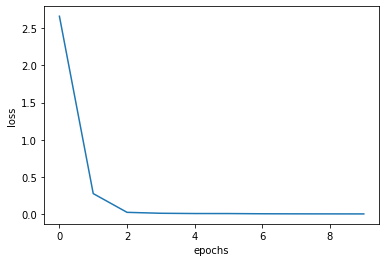

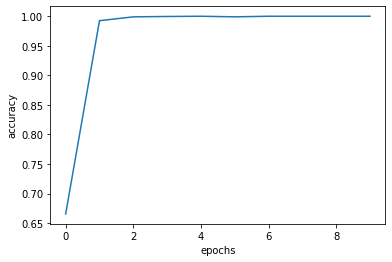

In [26]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()


In [27]:
pred=np.argmax(prediction, axis=1)
original=y_test[0]
print(original[41])

15


In [28]:
confusion = confusion_matrix(original,pred)

fig = px.imshow(confusion, labels=dict(x="Predicted Value", y="Actual Vlaue"),text_auto=True, title='Confusion Matrix')
fig.update_layout(title_x=0.5)
fig.show()

In [29]:
pred=np.argmax(prediction, axis=1)
original=y_test[0]
print(original[41])

15


In [30]:
count=0
for i in range(41):
    if(pred[i]-original[i]!=0):
        count+=1

Test_accuracy=(42-count)/42*100
for i in range(10):
    print(f"Predicted: {pred[i]}, Actual: {original[i]}")

Predicted: 15, Actual: 15
Predicted: 4, Actual: 4
Predicted: 16, Actual: 16
Predicted: 9, Actual: 9
Predicted: 14, Actual: 14
Predicted: 34, Actual: 34
Predicted: 1, Actual: 1
Predicted: 12, Actual: 12
Predicted: 17, Actual: 17
Predicted: 6, Actual: 6


####  Random Forest Classifier

In [32]:
clf = RandomForestClassifier(n_estimators=100, random_state=42) 
clf.fit(x_train, np.ravel(y_train))

RandomForestClassifier(random_state=42)

In [33]:
rf_predictions = clf.predict(x_test)
print(len(rf_predictions))

43


In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, rf_predictions)
mse = mean_squared_error(y_test, rf_predictions)
r2 = r2_score(y_test, rf_predictions)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Absolute Error: 0.4883720930232558
Mean Squared Error: 10.255813953488373
R-squared: 0.9288715013390747


In [36]:
print("Random Forest Test Accuracy:", clf.score(x_test, y_test))

Random Forest Test Accuracy: 0.9767441860465116


## Saving the Model

In [57]:
from joblib import dump,load

In [58]:
filename = 'rf_model.joblib'
model = clf
dump(model, filename)

['rf_model.joblib']

In [59]:
ml_model=load('rf_model.joblib')

#### Test Runs

In [63]:
inp = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])

# Reshape the 1D array into a 2D array with 1 row and 48 columns
inp = inp.reshape(1,-1)

# Make the prediction
prediction = ml_model.predict(inp)
print(prediction)

[31]


C:\Users\ThisPC\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [64]:
disease_classes[31]

'No disease'

In [77]:
"""
A function that takes in a list of numbers corresponsing to the symptom. Returns a dataframe suitable to undergo prediction
"""
def dis_data(values):
    symp_keys = x_train.columns
    symp_values = values
    dic = {symp_keys[i]: symp_values[i] for i in range(len(symp_keys))}
    df = pd.DataFrame(list(dic.items())).transpose()
    df.columns = df.iloc[0]
    df.drop(index=0, inplace=True)
    df.reset_index(inplace=True)
    df.drop(columns="index", inplace=True)

    return df

In [88]:
f = pd.read_csv("empty_df.csv")
f.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,history_of_alcohol_consumption,blood_in_sputum,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,blister,red_sore_around_nose
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
f.columns

Index(['Unnamed: 0', 'itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity',
       ...
       'history_of_alcohol_consumption', 'blood_in_sputum', 'palpitations',
       'painful_walking', 'pus_filled_pimples', 'blackheads', 'scurring',
       'skin_peeling', 'blister', 'red_sore_around_nose'],
      dtype='object', length=106)

In [75]:
d = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

#d = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
da = dis_data(d)
#da["itching"] = 1
#g = da.iloc[0].to_list()
ga = np.asarray(da).astype(np.float32)
model.predict(ga)
da.to_csv("empty_df.csv")

KeyError: "['Unnamed:0'] not found in axis"